In [1]:
import os

os.chdir("/home")

# Wstęp

Zadanie 10 jest pierwszą częścią zajęć laboratoryjnych poświęconych sieciom rekurencyjnym i predykcji z wykorzystaniem danych multimodalnych. Efektem prac będzie sieć rekurencyjna do predykcji kursu kryptowaluty Bitcoin (BTC) w oparciu o dane z giełdy oraz o wyniki analizy emocji komunikatów z mediów społecznościowych, do których również należy utworzyć dedykowany model sieci rekurencyjnej. Plan realizacji etapów wygląda następująco:

1.  EmoTweet - model sieci rekurencyjnej do analizy emocji (10 pkt., laboratorium 10)
2.  Agregacja informacji emotywnej i przygotowanie MultiBTC - multimodalnego model sieci rekurencyjnej do predykcji kursu BTC (10 pkt., laboratorium 11)
3.  Ewaluacja modelu MultiBTC (10 pkt., laboratorium 12)

Łącznie można otrzymać 30 punktów.

# Cel ćwiczenia

Celem pierwszego etapu prac jest zapoznanie się z podstawową siecią rekurencyjną LSTM. Ze względu na fakt, że model ten będzie wykorzystany do analizy emocji tekstu, w ramach teorii do zadania zostanie omówiony podstawowy mechanizm konwersji słów w tekście do postaci wektorów dystrybucyjnych (tzw. word embeddings) na podstawie rozwiązania o nazwie `fastText`. Modele będą budowane na ogólnodostępnym zbiorze `TweetEval`, zawierającym podzbiory ręcznie anotowanych tweetów przy pomocy etykiet odnoszących się do następujących zjawisk: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).

# Warunki zaliczenia

Do zaliczenia pierwszego etapu należy utworzyć następujące modele dla min. 2 wybranych zjawisk:

1.  Model bazowy (regresja logistyczna).
2.  Model rekurencyjny oparty o sieć LSTM.

Wytrenowane modele będą wykorzystane w 2 etapie, dlatego proszę je zachować.

# Wektory dystrybucyjne

W przetwarzaniu języka naturalnego, o wektorach dystrybucyjnych (inaczej osadzeniach lub zanurzeniach, ang. word embeddings) mówi się w kontekście reprezentacji słów w tekście, zazwyczaj w postaci wektora liczb rzeczywistych, który koduje znaczenie słowa. Hipoteza dystrybucyjna, u podstawy której leży większość metod reprezentacji, mówi o tym, że słowa, które często współwystępują, mają podobne znaczenie. Wektory dystrybucyjne można uzyskać za pomocą zestawu technik modelowania języka, w których słowa lub frazy są mapowane do wektorów liczb rzeczywistych. Z reguły polega to na matematycznym zanurzeniu z przestrzeni o wielu wymiarach opisujących słowo (konteksty) do ciągłej przestrzeni wektorowej o znacznie mniejszym wymiarze.

Metody generowania tego odwzorowania obejmują sieci neuronowe, redukcję wymiarowości na macierzy współwystępowania słów, modele probabilistyczne lub jawną reprezentację w kontekście, w którym pojawiają się słowa. Wektory dystrybucyjne, używane jako podstawowa reprezentacja wejściowa tekstu, okazały się istotnie poprawiać jakość w wielu zadaniach NLP, takich jak np. rozpoznawanie nazw własnych, określanie części mowy, rozpoznawanie dziedziny tekstu, czy też rozpoznawanie wydźwięku i emocji w tekście.

# fastText

[fastText](https://fasttext.cc/) jest biblioteką do efektywnego uczenia modeli reprezentacji wektorowych słów oraz do budowania klasyfikatorów tekstu. Modele językowe można budować z wykorzystaniem dwóch popularnych technik: [Continuous Bag of Words](https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html) oraz [Skip-Gram](https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c).

## Instalacja

Pobranie repozytorium projektu:


In [6]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1057/1057), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 3998 (delta 922), reused 884 (delta 856), pack-reused 2941
Receiving objects: 100% (3998/3998), 8.30 MiB | 21.62 MiB/s, done.
Resolving deltas: 100% (2529/2529), done.


Instalacja biblioteki:


In [2]:
!cd fastText && mkdir build && cd build && cmake ..  && make && make install

CMake Deprecation Warning at CMakeLists.txt:9 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 13.2.0
-- The CXX compiler identification is GNU 13.2.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done (1.2s)
-- Generating done (0.0s)
-- Build files have been written to: /home/piotr/projects/ai/gsn-l/lab-10/michal/fastText/build
[  2%] Building CXX object CMakeFiles/f

Instalacja API do Pythona:


In [2]:
pip install pybind11

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!cd fastText && pip install .

Processing home/piotr/lab10/fastText
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 51.2 MB/s eta 0:00:0000:0100:01
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4239650 sha256=372a79ac7e4e03b288f37d1edc230190753df8e528a3800a88fd03e27a5fd5f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ej5pljs/wheels/a4/50/45/ed116c6707873cca3e43a46007f880db0ad755c2f115b155d4
Successfully built fasttext


# Dane do etapu nr 1

## Korpus

Korpus (zbiór dokumentów) do realizacji etapu nr 1 pochodzi z repozytorium [TweetEval](https://github.com/cardiffnlp/tweeteval). Repozytorium zawiera 7 różnorodnych zbiorów danych, zawierających zanonimizowane wpisy z [Twittera](https://twitter.com), anotowane następującymi zjawiskami: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).


In [ ]:
# należy wgrać plik z katalogu "dane" o nazwie tweeteval.7z

In [ ]:
!7za x tweeteval.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,16 CPUs AMD Ryzen 7 3800XT 8-Core Processor             (870F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 17390348 bytes (17 MiB)

Extracting archive: tweeteval.7z
--
Path = tweeteval.7z
Type = 7z
Physical Size = 17390348
Headers Size = 1810
Method = LZMA2:24
Solid = +
Blocks = 1

     82% 79 - tweeteval/datasets/hate/train_text.t                                              Everything is Ok

Folders: 33
Files: 115
Size:       30563155
Compressed: 17390348


## Zawartość korpusu

W katalogu głównym (tweeteval) znajdują się następujące elementy:

- `datasets` - katalog ze zbiorami danych
- `emotion` - tweety anotowane emocjami
  - `mapping.txt` - identyfikatory etykiet oraz ich opis
  - `train_text.txt` - wpisy z Twittera (część ucząca)
  - `train_labels.txt` - etykiety wpisów z Twittera (część ucząca)
  - `test_*.txt, valid_*.txt` - j.w. (część testowa i walidacyjna)
- `emoji` - tweety anotowane emotikonami
- `...` - katalogi zawierające tweety anotowane pozostałymi zjawiskami
- `predictions` - katalog z przykładowymi predykcjami
- `emotion.txt` - etykiety modelu predykcyjnego dla części testowej danych `emotion`
- `emoji.txt` - j.w. dla cz. testowej danych `emoji`
- `...` - j.w. dla pozostałych danych
- `evaluation_script.py` - skrypt do ewaluacji

## Model języka

Na potrzeby zadania został przygotowany model Skip-Gram reprezentacji wektorowej słów, zbudowany na wielkim korpusie tweetów dotyczących kursu BTC. Wersja binarna tego modelu dostępna jest w 2 wariantach:

- wektory 100-elementowe (1.7GB, fasttext_tweetmodel_btc_sg_100_en.bin)
- wektory 20-elementowe (350MB, fasttext_tweetmodel_btc_sg_20_en.bin)

Na potrzeby prezentacji przykładowego rozwiązania zostanie wykorzystany mniejszy model. Do realizacji ostatecznego rozwiązania należy wykorzystać większy model.


# Model bazowy rozpoznawania emocji

Model bazowy, zbudowany z wykorzystaniem narzędzia fastText (oparty o regresję logistyczną), będzie punktem wyjścia do porównania się z modelami opartymi o sieci LSTM, których skonstruowanie i ewaluacja na wybranych zadaniach będzie celem etapu nr 1.

Pobranie mniejszego modelu reprezentacji języka tweetów:


In [ ]:
# należy wgrać plik z katalogu "dane" o nazwie fasttext_tweetmodel_btc_sg_20_en.bin

Wydobycie słownika wektorów z binarnego modelu języka:


In [1]:
!python fastText/python/doc/examples/bin_to_vec.py fasttext_tweetmodel_btc_sg_100_en.bin > fasttext_tweetmodel_btc_sg_100_en.vec

Dodanie prefiksu `__label__` do etykiet zbioru `emotion`:


In [ ]:
!sed 's/^/__label__/g' tweeteval/datasets/emotion/train_labels.txt > train_labels_emo.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/test_labels.txt > test_labels_emo.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/val_labels.txt > val_labels_emo.txt

Przygotowanie zbioru uczącego, testowego i walidacyjnego w formacie `fastText`:


In [ ]:
!paste -d " " tweeteval/datasets/emotion/train_text.txt train_labels_emo.txt > train_emo.txt
!paste -d " " tweeteval/datasets/emotion/test_text.txt test_labels_emo.txt > test_emo.txt
!paste -d " " tweeteval/datasets/emotion/val_text.txt val_labels_emo.txt > val_emo.txt

Trenowanie modelu z wykorzystaniem wejścia `train_emo.txt`, z określeniem wyjściowej nazwy modelu `emo_model`, dla wektorów słów o wymiarze `20`, z wykorzystaniem pretrenowanych wektorów z pliku `fasttext_tweetmodel_btc_sg_20_en.vec` i z uruchomieniem dostrajania hiperparametrów na zbiorze walidacyjnym `val_emo.txt`:


In [ ]:
!fasttext supervised -input train_emo.txt -output emo_model -dim 20 -pretrainedVectors fasttext_tweetmodel_btc_sg_20_en.vec -autotune-validation val_emo.txt 

Progress: 100.0% Trials:   41 Best score:  0.700535 ETA:   0h 0m 0s30s
Training again with best arguments
Read 0M words
Number of words:  12887
Number of labels: 4
Progress: 100.0% words/sec/thread:  551561 lr:  0.000000 avg.loss:  0.025569 ETA:   0h 0m 0s


Podstawowa ewaluacja modelu z wykorzystaniem `fastText`, wynikiem jest precyzja (P - precision) i kompletność (R - recall) w wariancie [weighted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).


In [ ]:
!fasttext test emo_model.bin test_emo.txt

N	1421
P@1	0.673
R@1	0.673


Rozszerzona ewaluacja modelu z wykorzystaniem `fastText`, wynikiem jest precyzja (P - precision), kompletność (R - recall) oraz F1-score dla każdej etykiety w wariancie [weighted](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).


In [ ]:
!fasttext test-label emo_model.bin test_emo.txt

F1-Score : 0.740433  Precision : 0.690994  Recall : 0.797491   __label__0
F1-Score : 0.657929  Precision : 0.658793  Recall : 0.657068   __label__3
F1-Score : 0.665676  Precision : 0.711111  Recall : 0.625698   __label__1
F1-Score : 0.362745  Precision : 0.456790  Recall : 0.300813   __label__2
N	1421
P@1	0.673
R@1	0.673


Przygotowanie danych do ewaluacji z wykorzystaniem skryptu dołączonego do zbioru TweetEval:


In [ ]:
!mkdir predictions2

In [ ]:
!fasttext predict emo_model.bin tweeteval/datasets/emotion/test_text.txt | sed 's/__label__//g' > predictions2/emotion.txt

Uruchomienie ewaluacji. Oprócz wyników P, R, F1 [weighted](<(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)>) dla każdej etykiety, otrzymujemy również wyniki w wariancie [macro](<(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)>). **Ostateczną miarą (TweetEval Score) jest miara F1-score w wariancie macro i tę miarę proszę traktować jako kluczową przy porównywaniu rozwiązań.**


In [ ]:
!python tweeteval/evaluation_script.py --tweeteval_path tweeteval/datasets --predictions_path predictions2 --task emotion

0 {'precision': 0.6909937888198758, 'recall': 0.7974910394265233, 'f1-score': 0.740432612312812, 'support': 558.0}
1 {'precision': 0.7111111111111111, 'recall': 0.6256983240223464, 'f1-score': 0.6656760772659732, 'support': 358.0}
2 {'precision': 0.4567901234567901, 'recall': 0.3008130081300813, 'f1-score': 0.3627450980392157, 'support': 123.0}
3 {'precision': 0.6587926509186351, 'recall': 0.6570680628272252, 'f1-score': 0.6579292267365662, 'support': 382.0}
accuracy 0.673469387755102
macro avg {'precision': 0.6294219185766031, 'recall': 0.595267608601544, 'f1-score': 0.6066957535886418, 'support': 1421.0}
weighted avg {'precision': 0.6671332088496638, 'recall': 0.673469387755102, 'f1-score': 0.6667276882504992, 'support': 1421.0}
------------------------------
TweetEval Score (emotion): 0.6066957535886418


# Budowa modeli EmoTweet

W tej sekcji Państwa zadaniem będzie przygotowanie modeli sieci LSTM oraz modeli bazowych opartych o regresję logistyczną (fastText) dla wybranych 2 zjawisk ze zbioru TweetEval. Dla sieci LSTM kolejne jednostki sieci rekurencyjnej na wejściu dostają reprezentację wektorową kolejnych wyrazów w tekście. Wyjście z ostatniej jednostki podlega klasyfikacji. W celu usprawnienia zadania, przedstawiona zostanie metoda reprezentacji wektorowej tekstu z wykorzystaniem Pythonowego API do narzędzia fastText. Do ewaluacji modeli należy wykorzystać uprzednio zaprezentowany skrypt `tweeteval/evaluation_script.py`.

## Wektoryzacja tekstu


In [7]:
# inicjalizacja biblioteki
import fasttext

In [10]:
# ładowanie modelu
MODEL_PATH = "fasttext_tweetmodel_btc_sg_20_en.bin"
model = fasttext.load_model(MODEL_PATH)

ValueError: fasttext_tweetmodel_btc_sg_20_en.bin cannot be opened for loading!

In [9]:
# wczytanie danych treningowych
import pandas as pd

TRAIN_PATH = "tweeteval/datasets/emotion/train_text.txt"
train_texts = pd.read_csv(TRAIN_PATH, sep="\t", header=None)
train_texts

ModuleNotFoundError: No module named 'pandas'

In [6]:
# wektoryzacja pierwszego tekstu
first_text = train_texts[0][0]
for word in fasttext.tokenize(first_text):
    print(word, model.get_word_id(word), model.get_word_vector(word))

“Worry -1 [-0.04189867  0.15429688  0.96717507  1.3809655   0.49123076 -0.5447607
 -0.11276884  0.20356484 -1.0640966  -1.6616327   0.03930127 -0.7224096
  0.21334486 -0.5872285   0.2898182   0.81751084 -1.6077403   1.8038087
  0.4850348   1.0643197 ]
is 6 [ 0.24099417  0.13544752  0.7251924   0.32544732  0.27421224  0.31903243
  0.7501186   0.22853182 -0.91543657  0.08587569  0.13866538 -0.38624704
 -0.30637258  0.13666666 -0.43992838 -0.12443608 -1.0383893  -0.06567164
  0.17007533 -0.16708991]
a 7 [-0.00810981 -0.03934941  0.81658655  0.56301105  0.43812367  0.29547286
  0.4691784   0.07483605 -0.58705056  0.28240088 -0.6339584  -0.16187707
 -0.23376046 -0.1245347   0.03071329 -0.07603034 -0.9066614  -0.07007706
  0.4522892  -0.15033531]
down 174 [ 0.9175071  -1.0815151   0.07119758  0.34226617  0.9607946   0.5973182
  0.91058624 -0.32068744 -0.72137564  1.2241784  -0.1882128  -0.23591968
 -0.02596712 -0.10194965 -0.09553405  0.36303622  0.22354192  0.4901933
  0.5405883   0.5965071

Proszę zwrócić uwagę, że fastText jest w stanie przyporządkować reprezentację wektorową nawet dla takich słów, których model języka nie widział w trakcie uczenia (pierwszy token wejściowego tekstu).


## Model klasyfikacji tekstu LSTM (2 pkt.)


In [23]:
import torch
from torch import nn
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from typing import Tuple
from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device.type

'cuda'

In [12]:
# TODO


class LSTMModel(nn.Module):

    def __init__(
        self,
        input_size: int,
        hidden_size: list[int],
        output_size: int,
        n_layers: int,
        dropout: float = 0.2,
    ):
        super().__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.lstm = nn.LSTM(
            input_size,
            self.hidden_size[0],
            self.n_layers,
            batch_first=True,
            dropout=dropout,
        )
        self.dropout = nn.Dropout(dropout)
        if len(hidden_size) > 1:
            linears = [
                nn.Linear(self.hidden_size[i], self.hidden_size[i + 1])
                for i in range(len(self.hidden_size) - 1)
            ]
        else:
            linears = []
        linears.append(nn.Linear(self.hidden_size[-1], output_size))
        self.fc = nn.Sequential(*linears)
        self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_size[0]).to(device)
        c0 = torch.zeros(self.n_layers, x.size(0), self.hidden_size[0]).to(device)

        output, (hidden_state, _) = self.lstm(x, (h0, c0))
        output = self.dropout(hidden_state[-1])
        output = self.fc(output)
        output = self.relu(output)
        return output

In [13]:
# Stwórz dataloader


def create_loader(
    TEXT_PATH: str,
    LABELS_PATH: str,
    MODEL_PATH: str = "fasttext_tweetmodel_btc_sg_100_en.bin",
    batch_size: int = 64,
):

    model = fasttext.load_model(MODEL_PATH)

    with open(TEXT_PATH, "r") as file:
        data = file.read()
    lines = data.split("\n")
    if lines[-1] == "":
        lines = lines[:-1]
    texts = pd.DataFrame(lines)

    representations = [
        torch.tensor(
            [model.get_word_vector(word) for word in fasttext.tokenize(texts[0][i])]
        )
        for i in range(len(texts))
    ]
    X = pad_sequence(representations, batch_first=True, padding_value=0.0)

    labels = pd.read_csv(LABELS_PATH, sep="\t", header=None).to_numpy()
    y = torch.tensor(labels).squeeze(1)

    loader = DataLoader(TensorDataset(X, y), batch_size=batch_size, shuffle=True)
    return loader

In [14]:
def count_correct(y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    preds = torch.argmax(y_pred, dim=1)
    not_bg = (y_true != 255).float()
    return ((preds == y_true).float() * not_bg).sum() / not_bg.sum()


def validate(
    model: nn.Module, loss_fn: torch.nn.CrossEntropyLoss, dataloader: DataLoader
) -> Tuple[torch.Tensor, torch.Tensor]:
    loss = 0
    correct = 0
    all = 0
    for X_batch, y_batch in dataloader:
        y_pred = model(X_batch.cuda())
        all += 1
        loss += loss_fn(y_pred, y_batch.cuda()).sum()
        correct += count_correct(y_pred, y_batch.cuda())
    return loss / all, correct / all


def fit(
    model: nn.Module,
    optimiser: optim.Optimizer,
    loss_fn: torch.nn.CrossEntropyLoss,
    train_dl: DataLoader,
    val_dl: DataLoader,
    epochs: int,
    print_metrics: str = True,
):
    epoch_log = []
    train_loss_log = []
    val_loss_log = []
    train_acc_log = []
    val_acc_log = []
    # best_loss = float("inf")
    # best_epoch = 0
    # patience = 10

    for epoch in range(epochs):
        epoch_log.append(epoch)

        for X_batch, y_batch in tqdm(train_dl):
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(
                X_batch
            )  # Uzyskanie pseudoprawdopodobieństw dla próbek z minibatcha
            loss = loss_fn(y_pred, y_batch)  # Policzenie funkcji straty

            loss.backward()  # Wsteczna propagacja z wyniku funkcji straty - policzenie gradientów i zapisanie ich w tensorach (parametrach)
            optimiser.step()  # Aktualizacja parametrów modelu przez optymalizator na podstawie gradientów zapisanych w tensorach (parametrach) oraz lr
            optimiser.zero_grad()  # Wyzerowanie gradientów w modelu, alternatywnie można wywołać percepron.zero_grad()
            model.eval()  # Przełączenie na tryb ewaluacji modelu - istotne dla takich warstw jak Dropuot czy BatchNorm

        with torch.no_grad():  # Wstrzymujemy przeliczanie i śledzenie gradientów dla tensorów - w procesie ewaluacji modelu nie chcemy zmian w gradientach
            train_loss, train_acc = validate(model, loss_fn, train_dl)
            val_loss, val_acc = validate(model, loss_fn, val_dl)
            train_loss_log.append(train_loss.item())
            val_loss_log.append(val_loss.item())
            train_acc_log.append(train_acc.item())
            val_acc_log.append(val_acc.item())

            # if val_loss < best_loss:
            #     best_loss = val_loss
            #     best_epoch = epoch
            # else:
            #     if epoch > best_epoch + patience:
            #         break

        if print_metrics:
            print(
                f"Epoch {epoch}: "
                f"train loss = {train_loss:.3f} (acc: {train_acc:.3f}), "
                f"validation loss = {val_loss:.3f} (acc: {val_acc:.3f})"
            )

    return (
        epoch_log,
        train_loss_log,
        val_loss_log,
        train_acc_log,
        val_acc_log,
        max(val_acc_log),
    )

## Trenowanie modeli LSTM dla ZJAWISKO_1 i ZJAWISKO_2 (2 pkt.)

Należy wybrać 2 z 7 dostępnych podzbiorów z [TweetEval](https://github.com/cardiffnlp/tweeteval) anotowanych następującymi zjawiskami: 1) emocje (emotion), 2) emotikony (emoji), 3) ironia (irony), 4) mowa nienawiści (hate speech), 5) mowa ofensywna (offensive language), 6) wydźwięk (sentiment), 7) nastawienie (stance).


#### Emotion (emocje)


In [20]:
import pandas as pd


# emotion
TRAIN_TEXT_EMOTION = "tweeteval/datasets/emotion/train_text.txt"
TRAIN_LABELS_EMOTION = "tweeteval/datasets/emotion/train_labels.txt"
VAL_TEXT_EMOTION = "tweeteval/datasets/emotion/test_text.txt"
VAL_LABELS_EMOTION = "tweeteval/datasets/emotion/test_labels.txt"

train_loader = create_loader(TRAIN_TEXT_EMOTION, TRAIN_LABELS_EMOTION, batch_size=32)
val_loader = create_loader(VAL_TEXT_EMOTION, VAL_LABELS_EMOTION, batch_size=32)

In [24]:
device = "cuda"
input_dim = 100
hidden_dim = [32, 16]
output_dim = 4
n_layers = 2
learning_rate = 0.001
model = LSTMModel(input_dim, hidden_dim, output_dim, n_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

(
    epoch_emotion,
    train_loss_emotion,
    val_loss_emotion,
    train_acc_emotion,
    val_acc_emotion,
    max_acc_emotion,
) = fit(model, optimizer, criterion, train_loader, val_loader, epochs=120)

 13%|█▎        | 13/102 [00:00<00:00, 127.16it/s]

100%|██████████| 102/102 [00:00<00:00, 270.69it/s]


Epoch 0: train loss = 1.267 (acc: 0.430), validation loss = 1.292 (acc: 0.394)


100%|██████████| 102/102 [00:00<00:00, 334.38it/s]


Epoch 1: train loss = 1.264 (acc: 0.430), validation loss = 1.291 (acc: 0.395)


100%|██████████| 102/102 [00:00<00:00, 348.72it/s]


Epoch 2: train loss = 1.171 (acc: 0.430), validation loss = 1.205 (acc: 0.392)


100%|██████████| 102/102 [00:00<00:00, 362.64it/s]


Epoch 3: train loss = 1.140 (acc: 0.504), validation loss = 1.162 (acc: 0.501)


100%|██████████| 102/102 [00:00<00:00, 365.77it/s]


Epoch 4: train loss = 1.139 (acc: 0.472), validation loss = 1.147 (acc: 0.490)


100%|██████████| 102/102 [00:00<00:00, 385.96it/s]


Epoch 5: train loss = 1.081 (acc: 0.539), validation loss = 1.122 (acc: 0.533)


100%|██████████| 102/102 [00:00<00:00, 373.79it/s]


Epoch 6: train loss = 1.091 (acc: 0.513), validation loss = 1.133 (acc: 0.510)


100%|██████████| 102/102 [00:00<00:00, 358.05it/s]


Epoch 7: train loss = 1.055 (acc: 0.551), validation loss = 1.098 (acc: 0.533)


100%|██████████| 102/102 [00:00<00:00, 415.89it/s]


Epoch 8: train loss = 1.033 (acc: 0.564), validation loss = 1.082 (acc: 0.556)


100%|██████████| 102/102 [00:00<00:00, 407.23it/s]


Epoch 9: train loss = 1.025 (acc: 0.581), validation loss = 1.067 (acc: 0.570)


100%|██████████| 102/102 [00:00<00:00, 417.70it/s]


Epoch 10: train loss = 1.006 (acc: 0.581), validation loss = 1.098 (acc: 0.564)


100%|██████████| 102/102 [00:00<00:00, 410.73it/s]


Epoch 11: train loss = 0.962 (acc: 0.612), validation loss = 1.091 (acc: 0.571)


100%|██████████| 102/102 [00:00<00:00, 407.19it/s]


Epoch 12: train loss = 0.925 (acc: 0.624), validation loss = 1.043 (acc: 0.589)


100%|██████████| 102/102 [00:00<00:00, 435.94it/s]


Epoch 13: train loss = 0.915 (acc: 0.639), validation loss = 1.000 (acc: 0.601)


100%|██████████| 102/102 [00:00<00:00, 404.50it/s]


Epoch 14: train loss = 0.978 (acc: 0.611), validation loss = 1.131 (acc: 0.578)


100%|██████████| 102/102 [00:00<00:00, 411.62it/s]


Epoch 15: train loss = 0.854 (acc: 0.671), validation loss = 1.007 (acc: 0.609)


100%|██████████| 102/102 [00:00<00:00, 435.67it/s]


Epoch 16: train loss = 0.845 (acc: 0.689), validation loss = 1.040 (acc: 0.626)


100%|██████████| 102/102 [00:00<00:00, 512.49it/s]


Epoch 17: train loss = 0.840 (acc: 0.678), validation loss = 1.006 (acc: 0.621)


100%|██████████| 102/102 [00:00<00:00, 522.65it/s]


Epoch 18: train loss = 0.813 (acc: 0.692), validation loss = 1.022 (acc: 0.615)


100%|██████████| 102/102 [00:00<00:00, 470.35it/s]


Epoch 19: train loss = 0.837 (acc: 0.686), validation loss = 1.005 (acc: 0.604)


100%|██████████| 102/102 [00:00<00:00, 492.30it/s]


Epoch 20: train loss = 0.781 (acc: 0.713), validation loss = 0.958 (acc: 0.643)


100%|██████████| 102/102 [00:00<00:00, 448.02it/s]


Epoch 21: train loss = 0.832 (acc: 0.690), validation loss = 1.009 (acc: 0.609)


100%|██████████| 102/102 [00:00<00:00, 500.59it/s]


Epoch 22: train loss = 0.738 (acc: 0.734), validation loss = 0.979 (acc: 0.629)


100%|██████████| 102/102 [00:00<00:00, 490.99it/s]


Epoch 23: train loss = 0.759 (acc: 0.725), validation loss = 1.036 (acc: 0.625)


100%|██████████| 102/102 [00:00<00:00, 441.85it/s]


Epoch 24: train loss = 0.699 (acc: 0.730), validation loss = 1.051 (acc: 0.617)


100%|██████████| 102/102 [00:00<00:00, 468.49it/s]


Epoch 25: train loss = 0.660 (acc: 0.762), validation loss = 1.009 (acc: 0.649)


100%|██████████| 102/102 [00:00<00:00, 495.78it/s]


Epoch 26: train loss = 0.632 (acc: 0.796), validation loss = 0.988 (acc: 0.654)


100%|██████████| 102/102 [00:00<00:00, 435.15it/s]


Epoch 27: train loss = 0.586 (acc: 0.811), validation loss = 0.990 (acc: 0.657)


100%|██████████| 102/102 [00:00<00:00, 494.19it/s]


Epoch 28: train loss = 0.579 (acc: 0.806), validation loss = 1.010 (acc: 0.673)


100%|██████████| 102/102 [00:00<00:00, 501.19it/s]


Epoch 29: train loss = 0.597 (acc: 0.789), validation loss = 0.992 (acc: 0.657)


100%|██████████| 102/102 [00:00<00:00, 469.97it/s]


Epoch 30: train loss = 0.546 (acc: 0.808), validation loss = 1.042 (acc: 0.646)


100%|██████████| 102/102 [00:00<00:00, 481.34it/s]


Epoch 31: train loss = 0.546 (acc: 0.820), validation loss = 0.997 (acc: 0.659)


100%|██████████| 102/102 [00:00<00:00, 469.50it/s]


Epoch 32: train loss = 0.694 (acc: 0.750), validation loss = 1.114 (acc: 0.637)


100%|██████████| 102/102 [00:00<00:00, 420.26it/s]


Epoch 33: train loss = 0.533 (acc: 0.827), validation loss = 1.093 (acc: 0.661)


100%|██████████| 102/102 [00:00<00:00, 531.89it/s]


Epoch 34: train loss = 0.496 (acc: 0.837), validation loss = 1.117 (acc: 0.665)


100%|██████████| 102/102 [00:00<00:00, 325.59it/s]


Epoch 35: train loss = 0.508 (acc: 0.835), validation loss = 1.109 (acc: 0.649)


100%|██████████| 102/102 [00:00<00:00, 343.59it/s]


Epoch 36: train loss = 0.474 (acc: 0.852), validation loss = 1.058 (acc: 0.651)


100%|██████████| 102/102 [00:00<00:00, 347.63it/s]


Epoch 37: train loss = 0.444 (acc: 0.859), validation loss = 1.082 (acc: 0.676)


100%|██████████| 102/102 [00:00<00:00, 342.67it/s]


Epoch 38: train loss = 0.430 (acc: 0.864), validation loss = 1.088 (acc: 0.662)


100%|██████████| 102/102 [00:00<00:00, 353.62it/s]


Epoch 39: train loss = 0.432 (acc: 0.866), validation loss = 1.121 (acc: 0.650)


100%|██████████| 102/102 [00:00<00:00, 370.75it/s]


Epoch 40: train loss = 0.417 (acc: 0.866), validation loss = 1.112 (acc: 0.675)


100%|██████████| 102/102 [00:00<00:00, 463.46it/s]


Epoch 41: train loss = 0.417 (acc: 0.871), validation loss = 1.087 (acc: 0.666)


100%|██████████| 102/102 [00:00<00:00, 480.10it/s]


Epoch 42: train loss = 0.425 (acc: 0.867), validation loss = 1.082 (acc: 0.665)


100%|██████████| 102/102 [00:00<00:00, 425.21it/s]


Epoch 43: train loss = 0.410 (acc: 0.877), validation loss = 1.074 (acc: 0.675)


100%|██████████| 102/102 [00:00<00:00, 466.99it/s]


Epoch 44: train loss = 0.393 (acc: 0.883), validation loss = 1.113 (acc: 0.671)


100%|██████████| 102/102 [00:00<00:00, 523.73it/s]


Epoch 45: train loss = 0.391 (acc: 0.880), validation loss = 1.121 (acc: 0.664)


100%|██████████| 102/102 [00:00<00:00, 521.43it/s]


Epoch 46: train loss = 0.492 (acc: 0.831), validation loss = 1.177 (acc: 0.649)


100%|██████████| 102/102 [00:00<00:00, 527.02it/s]


Epoch 47: train loss = 0.435 (acc: 0.862), validation loss = 1.084 (acc: 0.671)


100%|██████████| 102/102 [00:00<00:00, 513.43it/s]


Epoch 48: train loss = 0.366 (acc: 0.892), validation loss = 1.144 (acc: 0.669)


100%|██████████| 102/102 [00:00<00:00, 520.70it/s]


Epoch 49: train loss = 0.362 (acc: 0.887), validation loss = 1.174 (acc: 0.657)


100%|██████████| 102/102 [00:00<00:00, 524.70it/s]


Epoch 50: train loss = 0.646 (acc: 0.793), validation loss = 1.275 (acc: 0.647)


100%|██████████| 102/102 [00:00<00:00, 518.79it/s]


Epoch 51: train loss = 0.349 (acc: 0.893), validation loss = 1.191 (acc: 0.664)


100%|██████████| 102/102 [00:00<00:00, 521.60it/s]


Epoch 52: train loss = 0.330 (acc: 0.903), validation loss = 1.208 (acc: 0.676)


100%|██████████| 102/102 [00:00<00:00, 522.58it/s]


Epoch 53: train loss = 0.379 (acc: 0.880), validation loss = 1.249 (acc: 0.661)


100%|██████████| 102/102 [00:00<00:00, 497.18it/s]


Epoch 54: train loss = 0.342 (acc: 0.898), validation loss = 1.250 (acc: 0.664)


100%|██████████| 102/102 [00:00<00:00, 392.61it/s]


Epoch 55: train loss = 0.309 (acc: 0.910), validation loss = 1.150 (acc: 0.666)


100%|██████████| 102/102 [00:00<00:00, 355.25it/s]


Epoch 56: train loss = 0.346 (acc: 0.895), validation loss = 1.183 (acc: 0.654)


100%|██████████| 102/102 [00:00<00:00, 382.50it/s]


Epoch 57: train loss = 0.335 (acc: 0.899), validation loss = 1.207 (acc: 0.665)


100%|██████████| 102/102 [00:00<00:00, 386.53it/s]


Epoch 58: train loss = 0.290 (acc: 0.914), validation loss = 1.193 (acc: 0.672)


100%|██████████| 102/102 [00:00<00:00, 374.51it/s]


Epoch 59: train loss = 0.288 (acc: 0.919), validation loss = 1.259 (acc: 0.680)


100%|██████████| 102/102 [00:00<00:00, 391.34it/s]


Epoch 60: train loss = 0.514 (acc: 0.846), validation loss = 1.467 (acc: 0.635)


100%|██████████| 102/102 [00:00<00:00, 406.55it/s]


Epoch 61: train loss = 0.289 (acc: 0.915), validation loss = 1.282 (acc: 0.672)


100%|██████████| 102/102 [00:00<00:00, 472.10it/s]


Epoch 62: train loss = 0.313 (acc: 0.904), validation loss = 1.258 (acc: 0.675)


100%|██████████| 102/102 [00:00<00:00, 358.49it/s]


Epoch 63: train loss = 0.329 (acc: 0.905), validation loss = 1.312 (acc: 0.680)


100%|██████████| 102/102 [00:00<00:00, 372.08it/s]


Epoch 64: train loss = 0.319 (acc: 0.896), validation loss = 1.274 (acc: 0.657)


100%|██████████| 102/102 [00:00<00:00, 376.45it/s]


Epoch 65: train loss = 0.278 (acc: 0.920), validation loss = 1.345 (acc: 0.673)


100%|██████████| 102/102 [00:00<00:00, 374.63it/s]


Epoch 66: train loss = 0.351 (acc: 0.886), validation loss = 1.286 (acc: 0.654)


100%|██████████| 102/102 [00:00<00:00, 375.84it/s]


Epoch 67: train loss = 0.283 (acc: 0.918), validation loss = 1.258 (acc: 0.668)


100%|██████████| 102/102 [00:00<00:00, 369.73it/s]


Epoch 68: train loss = 0.263 (acc: 0.923), validation loss = 1.316 (acc: 0.667)


100%|██████████| 102/102 [00:00<00:00, 378.46it/s]


Epoch 69: train loss = 0.289 (acc: 0.911), validation loss = 1.344 (acc: 0.650)


100%|██████████| 102/102 [00:00<00:00, 375.21it/s]


Epoch 70: train loss = 0.251 (acc: 0.929), validation loss = 1.349 (acc: 0.658)


100%|██████████| 102/102 [00:00<00:00, 368.70it/s]


Epoch 71: train loss = 0.245 (acc: 0.929), validation loss = 1.324 (acc: 0.673)


100%|██████████| 102/102 [00:00<00:00, 456.74it/s]


Epoch 72: train loss = 0.259 (acc: 0.925), validation loss = 1.197 (acc: 0.670)


100%|██████████| 102/102 [00:00<00:00, 439.24it/s]


Epoch 73: train loss = 0.333 (acc: 0.903), validation loss = 1.376 (acc: 0.652)


100%|██████████| 102/102 [00:00<00:00, 486.30it/s]


Epoch 74: train loss = 0.316 (acc: 0.906), validation loss = 1.348 (acc: 0.653)


100%|██████████| 102/102 [00:00<00:00, 473.60it/s]


Epoch 75: train loss = 0.268 (acc: 0.916), validation loss = 1.346 (acc: 0.662)


100%|██████████| 102/102 [00:00<00:00, 422.30it/s]


Epoch 76: train loss = 0.238 (acc: 0.932), validation loss = 1.426 (acc: 0.666)


100%|██████████| 102/102 [00:00<00:00, 422.92it/s]


Epoch 77: train loss = 0.253 (acc: 0.926), validation loss = 1.361 (acc: 0.653)


100%|██████████| 102/102 [00:00<00:00, 385.75it/s]


Epoch 78: train loss = 0.288 (acc: 0.915), validation loss = 1.410 (acc: 0.651)


100%|██████████| 102/102 [00:00<00:00, 452.68it/s]


Epoch 79: train loss = 0.244 (acc: 0.931), validation loss = 1.390 (acc: 0.667)


100%|██████████| 102/102 [00:00<00:00, 480.42it/s]


Epoch 80: train loss = 0.219 (acc: 0.939), validation loss = 1.445 (acc: 0.659)


100%|██████████| 102/102 [00:00<00:00, 374.07it/s]


Epoch 81: train loss = 0.230 (acc: 0.935), validation loss = 1.324 (acc: 0.672)


100%|██████████| 102/102 [00:00<00:00, 418.56it/s]


Epoch 82: train loss = 0.221 (acc: 0.936), validation loss = 1.502 (acc: 0.651)


100%|██████████| 102/102 [00:00<00:00, 475.43it/s]


Epoch 83: train loss = 0.236 (acc: 0.931), validation loss = 1.498 (acc: 0.649)


100%|██████████| 102/102 [00:00<00:00, 462.56it/s]


Epoch 84: train loss = 0.226 (acc: 0.934), validation loss = 1.450 (acc: 0.657)


100%|██████████| 102/102 [00:00<00:00, 378.26it/s]


Epoch 85: train loss = 0.221 (acc: 0.935), validation loss = 1.437 (acc: 0.653)


100%|██████████| 102/102 [00:00<00:00, 427.84it/s]


Epoch 86: train loss = 0.210 (acc: 0.939), validation loss = 1.370 (acc: 0.660)


100%|██████████| 102/102 [00:00<00:00, 370.28it/s]


Epoch 87: train loss = 0.279 (acc: 0.925), validation loss = 1.520 (acc: 0.657)


100%|██████████| 102/102 [00:00<00:00, 394.39it/s]


Epoch 88: train loss = 0.214 (acc: 0.939), validation loss = 1.366 (acc: 0.653)


100%|██████████| 102/102 [00:00<00:00, 466.90it/s]


Epoch 89: train loss = 0.242 (acc: 0.923), validation loss = 1.426 (acc: 0.640)


100%|██████████| 102/102 [00:00<00:00, 471.79it/s]


Epoch 90: train loss = 0.232 (acc: 0.934), validation loss = 1.485 (acc: 0.664)


100%|██████████| 102/102 [00:00<00:00, 435.41it/s]


Epoch 91: train loss = 0.272 (acc: 0.920), validation loss = 1.309 (acc: 0.652)


100%|██████████| 102/102 [00:00<00:00, 443.34it/s]


Epoch 92: train loss = 0.209 (acc: 0.938), validation loss = 1.380 (acc: 0.664)


100%|██████████| 102/102 [00:00<00:00, 480.70it/s]


Epoch 93: train loss = 0.210 (acc: 0.936), validation loss = 1.445 (acc: 0.665)


100%|██████████| 102/102 [00:00<00:00, 438.75it/s]


Epoch 94: train loss = 0.185 (acc: 0.945), validation loss = 1.562 (acc: 0.667)


100%|██████████| 102/102 [00:00<00:00, 471.87it/s]


Epoch 95: train loss = 0.183 (acc: 0.945), validation loss = 1.589 (acc: 0.662)


100%|██████████| 102/102 [00:00<00:00, 458.55it/s]


Epoch 96: train loss = 0.210 (acc: 0.939), validation loss = 1.512 (acc: 0.656)


100%|██████████| 102/102 [00:00<00:00, 454.03it/s]


Epoch 97: train loss = 0.240 (acc: 0.924), validation loss = 1.550 (acc: 0.652)


100%|██████████| 102/102 [00:00<00:00, 422.96it/s]


Epoch 98: train loss = 0.174 (acc: 0.948), validation loss = 1.523 (acc: 0.662)


100%|██████████| 102/102 [00:00<00:00, 367.81it/s]


Epoch 99: train loss = 0.170 (acc: 0.951), validation loss = 1.591 (acc: 0.666)


100%|██████████| 102/102 [00:00<00:00, 365.27it/s]


Epoch 100: train loss = 0.197 (acc: 0.945), validation loss = 1.413 (acc: 0.663)


100%|██████████| 102/102 [00:00<00:00, 371.83it/s]


Epoch 101: train loss = 0.170 (acc: 0.948), validation loss = 1.516 (acc: 0.660)


100%|██████████| 102/102 [00:00<00:00, 473.35it/s]


Epoch 102: train loss = 0.172 (acc: 0.950), validation loss = 1.639 (acc: 0.670)


100%|██████████| 102/102 [00:00<00:00, 458.46it/s]


Epoch 103: train loss = 0.208 (acc: 0.940), validation loss = 1.632 (acc: 0.647)


100%|██████████| 102/102 [00:00<00:00, 438.18it/s]


Epoch 104: train loss = 0.273 (acc: 0.918), validation loss = 1.628 (acc: 0.668)


100%|██████████| 102/102 [00:00<00:00, 445.93it/s]


Epoch 105: train loss = 0.180 (acc: 0.947), validation loss = 1.597 (acc: 0.653)


100%|██████████| 102/102 [00:00<00:00, 457.98it/s]


Epoch 106: train loss = 0.170 (acc: 0.949), validation loss = 1.519 (acc: 0.655)


100%|██████████| 102/102 [00:00<00:00, 472.64it/s]


Epoch 107: train loss = 0.193 (acc: 0.941), validation loss = 1.681 (acc: 0.651)


100%|██████████| 102/102 [00:00<00:00, 450.88it/s]


Epoch 108: train loss = 0.152 (acc: 0.952), validation loss = 1.622 (acc: 0.663)


100%|██████████| 102/102 [00:00<00:00, 480.66it/s]


Epoch 109: train loss = 0.151 (acc: 0.956), validation loss = 1.803 (acc: 0.649)


100%|██████████| 102/102 [00:00<00:00, 529.29it/s]


Epoch 110: train loss = 0.141 (acc: 0.955), validation loss = 1.712 (acc: 0.661)


100%|██████████| 102/102 [00:00<00:00, 472.71it/s]


Epoch 111: train loss = 0.146 (acc: 0.952), validation loss = 1.796 (acc: 0.659)


100%|██████████| 102/102 [00:00<00:00, 475.08it/s]


Epoch 112: train loss = 0.130 (acc: 0.959), validation loss = 1.743 (acc: 0.657)


100%|██████████| 102/102 [00:00<00:00, 382.62it/s]


Epoch 113: train loss = 0.141 (acc: 0.954), validation loss = 1.854 (acc: 0.656)


100%|██████████| 102/102 [00:00<00:00, 380.49it/s]


Epoch 114: train loss = 0.144 (acc: 0.954), validation loss = 1.574 (acc: 0.654)


100%|██████████| 102/102 [00:00<00:00, 363.83it/s]


Epoch 115: train loss = 0.150 (acc: 0.953), validation loss = 1.759 (acc: 0.644)


100%|██████████| 102/102 [00:00<00:00, 375.00it/s]


Epoch 116: train loss = 0.175 (acc: 0.942), validation loss = 1.662 (acc: 0.656)


100%|██████████| 102/102 [00:00<00:00, 458.02it/s]


Epoch 117: train loss = 0.169 (acc: 0.950), validation loss = 1.717 (acc: 0.668)


100%|██████████| 102/102 [00:00<00:00, 339.54it/s]


Epoch 118: train loss = 0.198 (acc: 0.941), validation loss = 1.653 (acc: 0.679)


100%|██████████| 102/102 [00:00<00:00, 348.41it/s]


Epoch 119: train loss = 0.138 (acc: 0.955), validation loss = 1.559 (acc: 0.659)


In [27]:
# save the model
torch.save(model.state_dict(), "emotion_model.pth")

<All keys matched successfully>

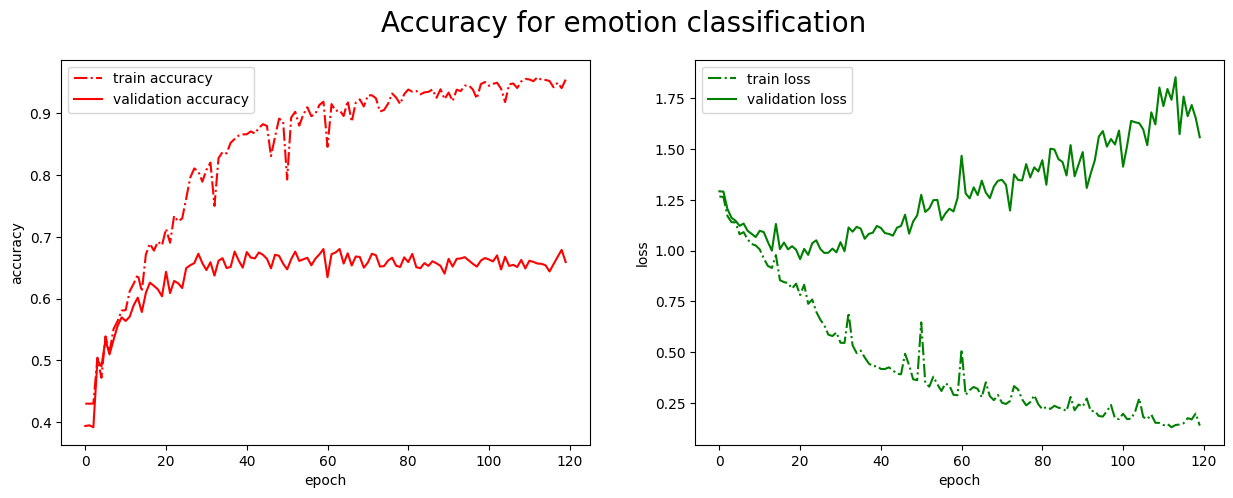

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(
    epoch_emotion,
    train_acc_emotion,
    color="red",
    linestyle="-.",
    label="train accuracy",
)
axs[0].plot(
    epoch_emotion,
    val_acc_emotion,
    color="red",
    linestyle="-",
    label="validation accuracy",
)
axs[0].legend()
axs[0].set_xlabel("epoch")
axs[0].set_ylabel("accuracy")
axs[1].plot(
    epoch_emotion,
    train_loss_emotion,
    color="green",
    linestyle="-.",
    label="train loss",
)
axs[1].plot(
    epoch_emotion,
    val_loss_emotion,
    color="green",
    linestyle="-",
    label="validation loss",
)
axs[1].legend()
axs[1].set_xlabel("epoch")
axs[1].set_ylabel("loss")
plt.suptitle("Accuracy for emotion classification", fontsize=20)
plt.show()

#### Emoji


In [28]:
# TRAIN_TEXT_IRONY = "tweeteval/datasets/irony/train_text.txt"
# TRAIN_LABELS_IRONY = "tweeteval/datasets/irony/train_labels.txt"
# VAL_TEXT_IRONY = "tweeteval/datasets/irony/test_text.txt"
# VAL_LABELS_IRONY = "tweeteval/datasets/irony/test_labels.txt"

TRAIN_TEXT_IRONY = "tweeteval/datasets/emoji/train_text.txt"
TRAIN_LABELS_IRONY = "tweeteval/datasets/emoji/train_labels.txt"
VAL_TEXT_IRONY = "tweeteval/datasets/emoji/test_text.txt"
VAL_LABELS_IRONY = "tweeteval/datasets/emoji/test_labels.txt"

# TRAIN_TEXT_IRONY = "tweeteval/datasets/offensive/train_text.txt"
# TRAIN_LABELS_IRONY = "tweeteval/datasets/offensive/train_labels.txt"
# VAL_TEXT_IRONY = "tweeteval/datasets/offensive/test_text.txt"
# VAL_LABELS_IRONY = "tweeteval/datasets/offensive/test_labels.txt"

# atheism stance
# TRAIN_TEXT_IRONY= "tweeteval/datasets/stance/atheism/train_text.txt"
# TRAIN_LABELS_IRONY= "tweeteval/datasets/stance/atheism/train_labels.txt"
# VAL_TEXT_IRONY = "tweeteval/datasets/stance/atheism/test_text.txt"
# VAL_LABELS_IRONY = "tweeteval/datasets/stance/atheism/test_labels.txt"


train_loader = create_loader(TRAIN_TEXT_IRONY, TRAIN_LABELS_IRONY, batch_size=32)
val_loader = create_loader(VAL_TEXT_IRONY, VAL_LABELS_IRONY, batch_size=32)

In [29]:
input_dim = 100
hidden_dim = [32, 16]
output_dim = 20
n_layers = 2
learning_rate = 0.001

model = LSTMModel(input_dim, hidden_dim, output_dim, n_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

(
    epoch_irony,
    train_loss_irony,
    val_loss_irony,
    train_acc_irony,
    val_acc_irony,
    max_acc_irony,
) = fit(model, optimizer, criterion, train_loader, val_loader, epochs=40)

  3%|▎         | 41/1407 [00:00<00:03, 408.70it/s]

100%|██████████| 1407/1407 [00:04<00:00, 314.60it/s]


Epoch 0: train loss = 2.722 (acc: 0.205), validation loss = 2.731 (acc: 0.216)


100%|██████████| 1407/1407 [00:02<00:00, 490.41it/s]


Epoch 1: train loss = 2.629 (acc: 0.223), validation loss = 2.636 (acc: 0.214)


100%|██████████| 1407/1407 [00:03<00:00, 368.05it/s]


Epoch 2: train loss = 2.606 (acc: 0.228), validation loss = 2.610 (acc: 0.225)


100%|██████████| 1407/1407 [00:04<00:00, 318.81it/s]


Epoch 3: train loss = 2.605 (acc: 0.239), validation loss = 2.605 (acc: 0.235)


100%|██████████| 1407/1407 [00:03<00:00, 420.23it/s]


Epoch 4: train loss = 2.748 (acc: 0.205), validation loss = 2.759 (acc: 0.216)


100%|██████████| 1407/1407 [00:03<00:00, 421.07it/s]


Epoch 5: train loss = 2.749 (acc: 0.205), validation loss = 2.760 (acc: 0.216)


100%|██████████| 1407/1407 [00:04<00:00, 350.88it/s]


Epoch 6: train loss = 2.749 (acc: 0.204), validation loss = 2.759 (acc: 0.216)


100%|██████████| 1407/1407 [00:03<00:00, 384.46it/s]


Epoch 7: train loss = 2.749 (acc: 0.205), validation loss = 2.758 (acc: 0.216)


100%|██████████| 1407/1407 [00:03<00:00, 423.61it/s]


Epoch 8: train loss = 2.748 (acc: 0.204), validation loss = 2.759 (acc: 0.216)


100%|██████████| 1407/1407 [00:04<00:00, 340.16it/s]


Epoch 9: train loss = 2.564 (acc: 0.242), validation loss = 2.567 (acc: 0.236)


100%|██████████| 1407/1407 [00:03<00:00, 384.07it/s]


Epoch 10: train loss = 2.719 (acc: 0.204), validation loss = 2.733 (acc: 0.216)


100%|██████████| 1407/1407 [00:03<00:00, 437.51it/s]


Epoch 11: train loss = 2.716 (acc: 0.204), validation loss = 2.726 (acc: 0.216)


100%|██████████| 1407/1407 [00:03<00:00, 399.81it/s]


Epoch 12: train loss = 2.497 (acc: 0.253), validation loss = 2.498 (acc: 0.245)


100%|██████████| 1407/1407 [00:03<00:00, 367.08it/s]


Epoch 13: train loss = 2.472 (acc: 0.255), validation loss = 2.474 (acc: 0.248)


100%|██████████| 1407/1407 [00:03<00:00, 378.82it/s]


Epoch 14: train loss = 2.455 (acc: 0.260), validation loss = 2.460 (acc: 0.254)


100%|██████████| 1407/1407 [00:04<00:00, 326.20it/s]


Epoch 15: train loss = 2.448 (acc: 0.260), validation loss = 2.456 (acc: 0.255)


100%|██████████| 1407/1407 [00:04<00:00, 347.10it/s]


Epoch 16: train loss = 2.447 (acc: 0.261), validation loss = 2.452 (acc: 0.255)


100%|██████████| 1407/1407 [00:04<00:00, 312.76it/s]


Epoch 17: train loss = 2.445 (acc: 0.261), validation loss = 2.452 (acc: 0.255)


100%|██████████| 1407/1407 [00:03<00:00, 363.65it/s]


Epoch 18: train loss = 2.443 (acc: 0.261), validation loss = 2.451 (acc: 0.256)


100%|██████████| 1407/1407 [00:03<00:00, 416.02it/s]


Epoch 19: train loss = 2.441 (acc: 0.262), validation loss = 2.447 (acc: 0.257)


100%|██████████| 1407/1407 [00:03<00:00, 431.88it/s]


Epoch 20: train loss = 2.399 (acc: 0.301), validation loss = 2.417 (acc: 0.287)


100%|██████████| 1407/1407 [00:03<00:00, 413.24it/s]


Epoch 21: train loss = 2.442 (acc: 0.268), validation loss = 2.457 (acc: 0.258)


100%|██████████| 1407/1407 [00:03<00:00, 428.24it/s]


Epoch 22: train loss = 2.421 (acc: 0.291), validation loss = 2.434 (acc: 0.278)


100%|██████████| 1407/1407 [00:03<00:00, 354.83it/s]


Epoch 23: train loss = 2.390 (acc: 0.306), validation loss = 2.412 (acc: 0.291)


100%|██████████| 1407/1407 [00:03<00:00, 463.95it/s]


Epoch 24: train loss = 2.381 (acc: 0.307), validation loss = 2.411 (acc: 0.286)


100%|██████████| 1407/1407 [00:03<00:00, 444.74it/s]


Epoch 25: train loss = 2.380 (acc: 0.307), validation loss = 2.403 (acc: 0.288)


100%|██████████| 1407/1407 [00:02<00:00, 498.00it/s]


Epoch 26: train loss = 2.369 (acc: 0.312), validation loss = 2.404 (acc: 0.292)


100%|██████████| 1407/1407 [00:04<00:00, 322.75it/s]


Epoch 27: train loss = 2.362 (acc: 0.311), validation loss = 2.396 (acc: 0.291)


100%|██████████| 1407/1407 [00:04<00:00, 348.90it/s]


Epoch 28: train loss = 2.360 (acc: 0.315), validation loss = 2.397 (acc: 0.295)


100%|██████████| 1407/1407 [00:04<00:00, 344.50it/s]


Epoch 29: train loss = 2.342 (acc: 0.317), validation loss = 2.383 (acc: 0.294)


In [ ]:
# save the model
torch.save(model.state_dict(), "emoji_model.pth")

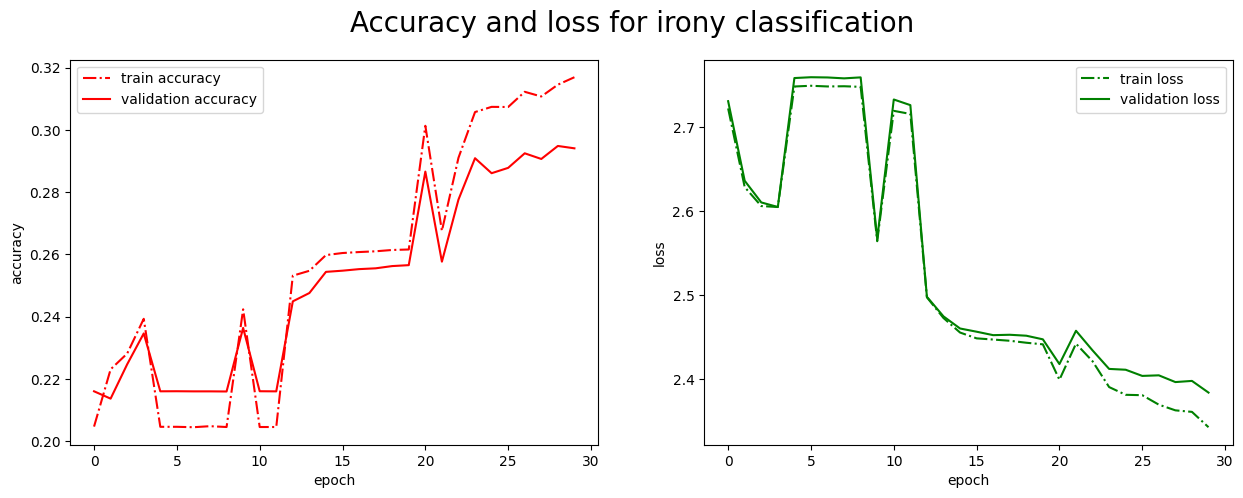

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(
    epoch_irony, train_acc_irony, color="red", linestyle="-.", label="train accuracy"
)
axs[0].plot(
    epoch_irony, val_acc_irony, color="red", linestyle="-", label="validation accuracy"
)
axs[0].legend()
axs[0].set_xlabel("epoch")
axs[0].set_ylabel("accuracy")
axs[1].plot(
    epoch_irony, train_loss_irony, color="green", linestyle="-.", label="train loss"
)
axs[1].plot(
    epoch_irony, val_loss_irony, color="green", linestyle="-", label="validation loss"
)
axs[1].legend()
axs[1].set_xlabel("epoch")
axs[1].set_ylabel("loss")
plt.suptitle("Accuracy and loss for irony classification", fontsize=20)
plt.show()

## Trenowanie modeli LR (fastText) dla ZJAWISKO_1 i ZJAWISKO_2 (2 pkt.)


#### Emocje (Emotion)


In [67]:
!mkdir emotion_dir && cd emotion_dir && mkdir data

!sed 's/^/__label__/g' tweeteval/datasets/emotion/train_labels.txt > emotion_dir/data/train_labels_emotion.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/test_labels.txt > emotion_dir/data/test_labels_emotion.txt
!sed 's/^/__label__/g' tweeteval/datasets/emotion/val_labels.txt > emotion_dir/data/val_labels_emotion.txt

!paste -d " " tweeteval/datasets/emotion/train_text.txt emotion_dir/data/train_labels_emotion.txt > emotion_dir/data/train_emotion.txt
!paste -d " " tweeteval/datasets/emotion/test_text.txt emotion_dir/data/test_labels_emotion.txt > emotion_dir/data/test_emotion.txt
!paste -d " " tweeteval/datasets/emotion/val_text.txt emotion_dir/data/val_labels_emotion.txt > emotion_dir/data/val_emotion.txt

!fasttext supervised -input emotion_dir/data/train_emotion.txt -output emotion_dir/emotion_model -dim 20 -pretrainedVectors fasttext_tweetmodel_btc_sg_20_en.vec -autotune-validation emotion_dir/data/val_emotion.txt

mkdir: cannot create directory ‘emotion_dir’: File exists
Progress: 100.0% Trials:   23 Best score:  0.687166 ETA:   0h 0m 0s
Training again with best arguments
Read 0M words
Number of words:  12887
Number of labels: 4
Progress: 100.0% words/sec/thread:  372228 lr:  0.000000 avg.loss:  0.329187 ETA:   0h 0m 0s


#### Emoji


In [70]:
!mkdir irony_dir && cd irony_dir && mkdir data

!sed 's/^/__label__/g' tweeteval/datasets/irony/train_labels.txt > irony_dir/data/train_labels_irony.txt
!sed 's/^/__label__/g' tweeteval/datasets/irony/test_labels.txt > irony_dir/data/test_labels_irony.txt
!sed 's/^/__label__/g' tweeteval/datasets/irony/val_labels.txt > irony_dir/data/val_labels_irony.txt

!paste -d " " tweeteval/datasets/irony/train_text.txt irony_dir/data/train_labels_irony.txt > irony_dir/data/train_irony.txt
!paste -d " " tweeteval/datasets/irony/test_text.txt irony_dir/data/test_labels_irony.txt > irony_dir/data/test_irony.txt
!paste -d " " tweeteval/datasets/irony/val_text.txt irony_dir/data/val_labels_irony.txt > irony_dir/data/val_irony.txt

!fasttext supervised -input irony_dir/data/train_irony.txt -output irony_dir/irony_model -dim 20 -pretrainedVectors fasttext_tweetmodel_btc_sg_20_en.vec -autotune-validation irony_dir/data/val_irony.txt

terminate called after throwing an instance of 'std::invalid_argument'
  what():  Dimension of pretrained vectors (139928873913168) does not match dimension (100)!


## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_1 (2 pkt.)


In [23]:
!cd emotion_dir && mkdir predictions

!fasttext predict emotion_dir/emotion_model.bin tweeteval/datasets/emotion/test_text.txt | sed 's/__label__//g' > emotion_dir/predictions/emotion.txt

!python tweeteval/evaluation_script.py --tweeteval_path tweeteval/datasets --predictions_path emotion_dir/predictions --task emotion

/bin/bash: line 1: cd: emotion_dir: No such file or directory
/bin/bash: line 1: emotion_dir/predictions/emotion.txt: No such file or directory
terminate called after throwing an instance of 'std::invalid_argument'
  what():  emotion_dir/emotion_model.bin cannot be opened for loading!
Traceback (most recent call last):
  File "/home/piotr/projects/ai/gsn-l/lab-10/tweeteval/evaluation_script.py", line 12, in <module>
    from sklearn.metrics import classification_report
ModuleNotFoundError: No module named 'sklearn'


## Ewaluacja modeli na danych testowych dla zjawiska ZJAWISKO_2 (2 pkt.)


In [ ]:
!cd irony_dir && mkdir predictions

!fasttext predict irony_dir/irony_model.bin tweeteval/datasets/irony/test_text.txt | sed 's/__label__//g' > irony_dir/predictions/irony.txt

!python tweeteval/evaluation_script.py --tweeteval_path tweeteval/datasets --predictions_path irony_dir/predictions --task irony

home/piotr/venvy/DL_LAB1012/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
home/piotr/venvy/DL_LAB1012/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
home/piotr/venvy/DL_LAB1012/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)